In [3]:
from PIL import Image
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import glob
import torch
sys.path.append('..')
import utils
plt.rcParams["font.family"] = "Times New Roman"

[[0.166992, 0.25293, 0.0078125, 0.0078125], [0.844238, 0.723145, 0.00878906, 0.00878906], [0.0712891, 0.973633, 0.00585938, 0.00585938], [0.0878906, 0.561523, 0.0078125, 0.0078125], [0.460449, 0.302246, 0.00683594, 0.00683594], [0.297363, 0.946777, 0.00683594, 0.00683594], [0.819336, 0.544922, 0.0078125, 0.0078125], [0.383789, 0.242188, 0.0078125, 0.0078125], [0.120117, 0.0644531, 0.00585938, 0.00585938], [0.0585938, 0.158691, 0.00585938, 0.00683594], [0.114746, 0.718262, 0.00683594, 0.00683594]]


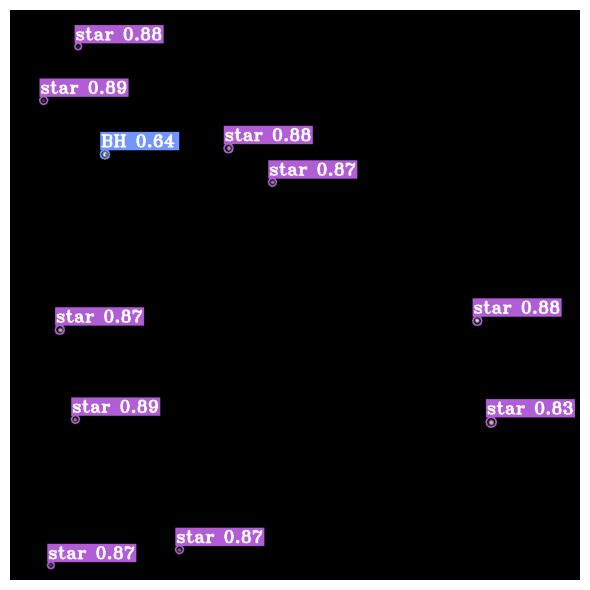

In [5]:
utils.labels_plot(
    image_paths=r'../model_testing/output_img_conv.png',
    label_paths=r"../model_testing/output_img_conv.txt",
    num_samples=1, SHOW=True, SAVE=True, num_circles=11, save_dir=Path('images'), subplots_col=1, conf=True,
    save_name='conf'
)

In [7]:
img_arr1 = cv2.imread(r'images/conf.png')
img_arr2 = cv2.imread(r'../model_testing/output_img_conv.png')

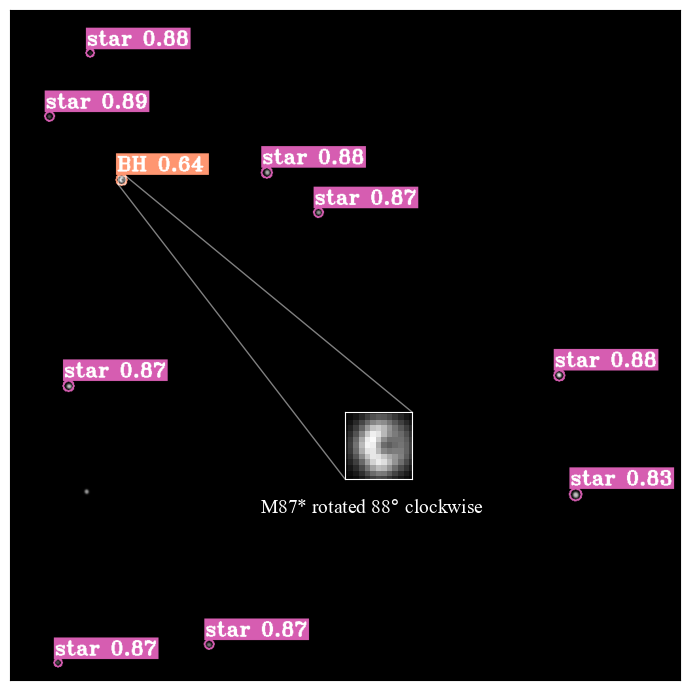

In [39]:
with open('../model_testing/output_img_conv.txt') as f:
    xc, yc, w, h, _ = map(float, f.readline().strip().split(' ')[1:])
xc, yc, w, h = int(xc * 1024), int(yc * 1024), int(w * 1024 * 1.5), int(h * 1024 * 1.5)

fig, ax = plt.subplots(figsize=(7, 7))
# plt.imshow(img_arr)
ax.imshow(img_arr1, cmap='gray')
x1, x2, y1, y2 = xc - w // 2, xc + w // 2, yc - h // 2, yc + h // 2
axin1 = ax.inset_axes(
    [0.5, 0.3, 0.1, 0.1],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[], xticks=[], yticks=[])
axin1.imshow(img_arr2, cmap='gray')
axin1.spines['bottom'].set_color('white')
axin1.spines['top'].set_color('white') 
axin1.spines['right'].set_color('white')
axin1.spines['left'].set_color('white')
ax.indicate_inset_zoom(axin1, edgecolor="white")
ax.annotate('M87* rotated 88$\degree$ clockwise', (0.5*1024 - 130, 0.75*1024), color='white', fontsize=14)
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
plt.savefig('images/conf_zoomed.png', dpi=600)
plt.savefig('images/conf_zoomed.pdf', dpi=600)
plt.show()